<ipython-input-5-ea5d0b930513>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Mean Squared Error: 1738391.0685404064


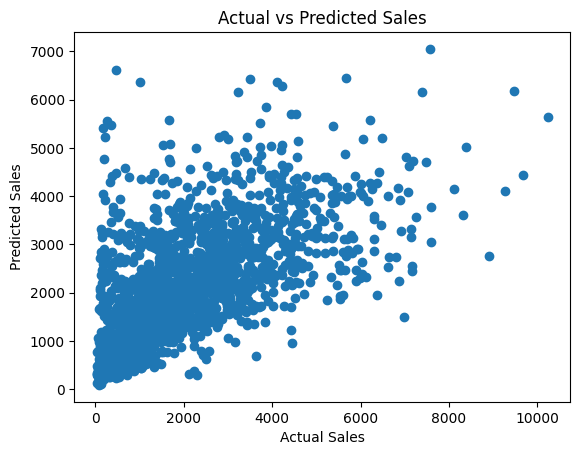

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

data = pd.read_csv('Train big mart sale.csv')

label_encoder = LabelEncoder()
data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = label_encoder.fit_transform(data['Item_Type'])

data.fillna(data.mean(), inplace=True)

X = data.drop(['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()